In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [26]:
#load the dataset
df1 = pd.read_csv("C:/Users/Ketki/Data Analytics/Project 1 Level 1/retail_sales_dataset.csv")

#preview dataset
df1.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [27]:
# Drop duplicates
df1.drop_duplicates(inplace=True)

# Convert date column
df1['Date'] = pd.to_datetime(df1['Date'])

# Fill or drop missing values
df1 = df1.dropna() 

#recheck
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [6]:
df1.drop_duplicates(inplace=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.dropna() 

In [10]:
# Summary statistics for numeric columns
print("\nDescriptive Statistics:\n")

# Central tendency measures for 'Total Amount'
print("\nMean Total Amount:", df1['Total Amount'].mean())
print("Median Total Amount:", df1['Total Amount'].median())
print("Mode Total Amount:", df1['Total Amount'].mode()[0])
print("Standard Deviation Total Amount:", df1['Total Amount'].std())


Descriptive Statistics:


Mean Total Amount: 456.0
Median Total Amount: 135.0
Mode Total Amount: 50
Standard Deviation Total Amount: 559.997631555123


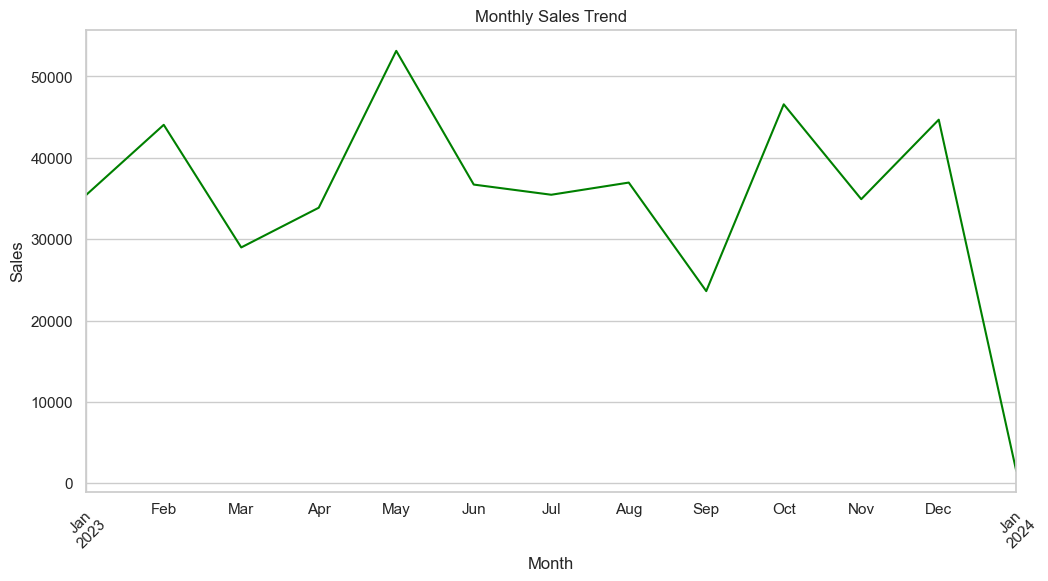

In [83]:
# Aggregate total sales by month
df1['Month'] = df1['Date'].dt.to_period('M')
monthly_sales = df1.groupby('Month')['Total Amount'].sum()

# Plot monthly sales trend
monthly_sales.plot(figsize=(12,6), title='Monthly Sales Trend', color='green')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


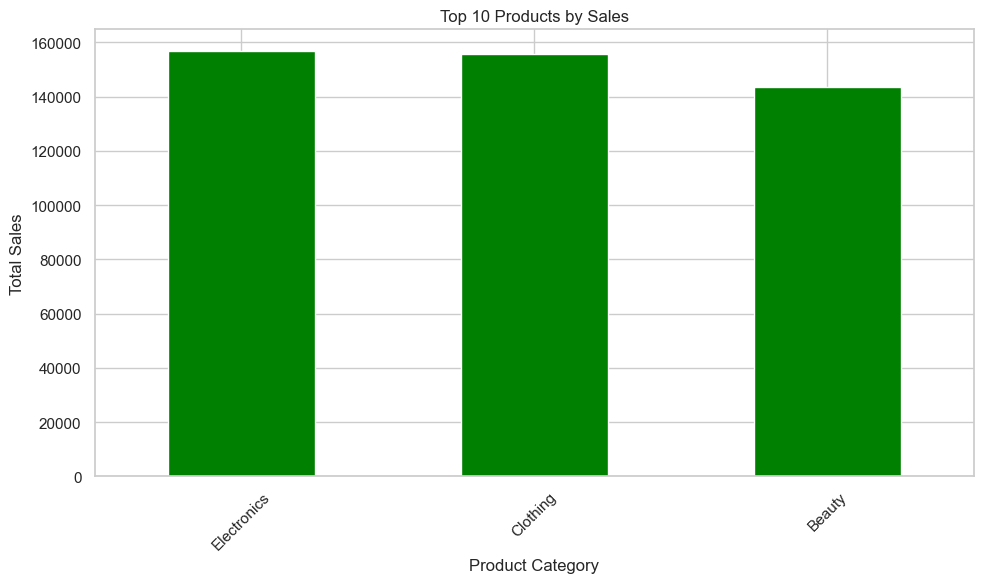

In [82]:
top_products = df1.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,6), color='green', title='Top 10 Products by Sales')
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


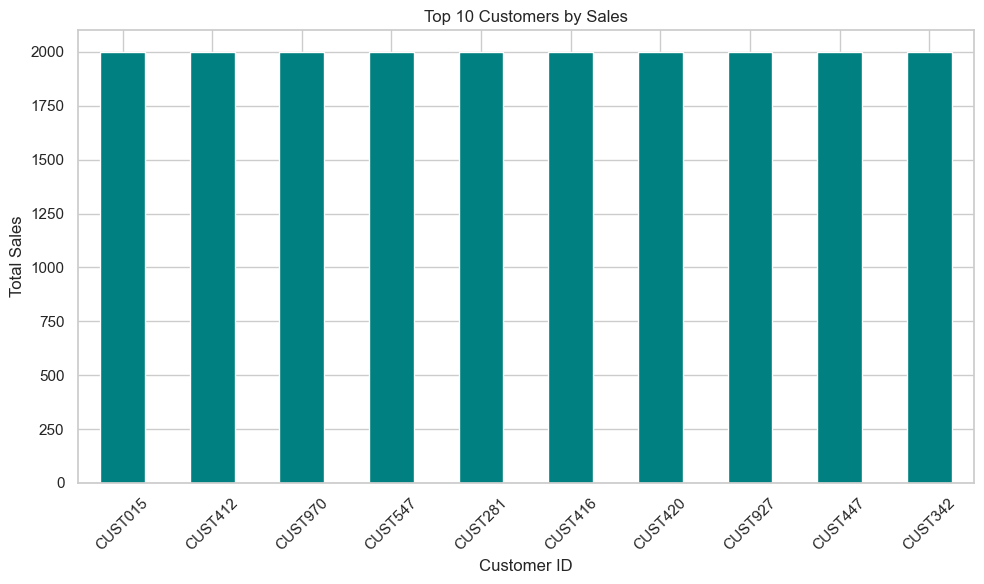

In [87]:
top_customers = df1.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(10,6), color="teal", title='Top 10 Customers by Sales')
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

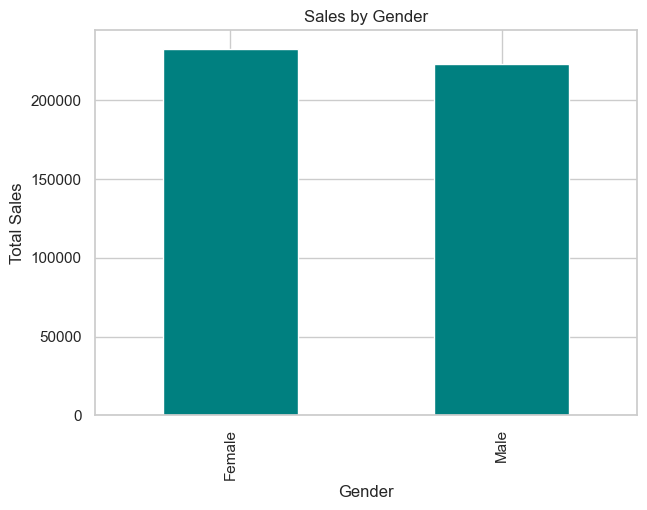

In [84]:
# Sales by Gender
gender_sales = df1.groupby('Gender')['Total Amount'].sum()
plt.figure(figsize=(7,5))
gender_sales.plot(kind='bar', color="teal")
plt.title("Sales by Gender")
plt.ylabel("Total Sales")
plt.show()

<Figure size 1000x600 with 0 Axes>

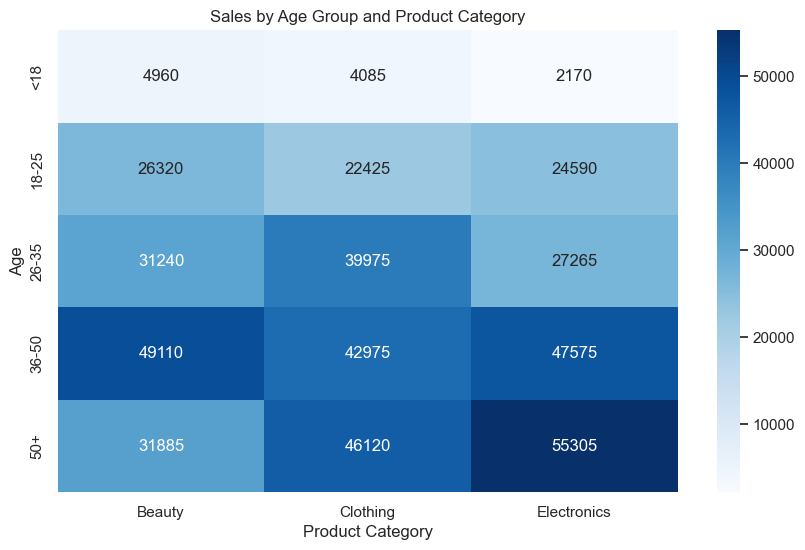

In [75]:
pivot3 = pd.pivot_table(df1, 
                        index='Age', 
                        columns='Product Category', 
                        values='Total Amount', 
                        aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot3, annot=True, fmt='.0f', cmap='Blues')
plt.title('Sales by Age Group and Product Category')
plt.show()